In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diabetes = pd.read_csv('diabetic_data.csv')

In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [4]:
# to keep only columns of interest(demographic data, medications and readmitted)
diabetes = diabetes.loc[:, ~diabetes.columns.isin(['encounter_id','patient_nbr','weight','admission_type_id',
                                                   'discharge_disposition_id','admission_source_id','payer_code',
                                                   'medical_specialty','diag_1','diag_2','diag_3','number_diagnoses',
                                                   'max_glu_serum','A1Cresult','change','diabetesMed'])]

In [5]:
diabetes.age = diabetes.age.str[1:-1]

In [6]:
diabetes.loc[0:100000:10000]

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,readmitted
0,Caucasian,Female,0-10,1,41,0,1,0,0,0,...,No,No,No,No,No,No,No,No,No,NO
10000,Caucasian,Female,80-90,9,61,1,14,0,0,0,...,No,No,No,No,No,No,No,No,No,>30
20000,Caucasian,Male,60-70,9,56,2,30,0,0,1,...,No,No,No,Steady,No,No,No,No,No,>30
30000,Caucasian,Male,40-50,4,37,2,9,0,0,0,...,No,No,No,No,No,No,No,No,No,NO
40000,Caucasian,Female,40-50,2,39,3,18,0,0,0,...,No,No,No,No,No,No,No,No,No,NO
50000,Caucasian,Female,60-70,4,43,0,13,1,0,0,...,No,No,No,Steady,No,No,No,No,No,>30
60000,Caucasian,Male,40-50,2,37,0,16,0,0,3,...,No,No,No,Steady,No,No,No,No,No,NO
70000,Other,Male,40-50,2,55,1,9,0,0,0,...,No,No,No,No,No,No,No,No,No,NO
80000,Caucasian,Male,70-80,1,22,6,17,0,0,0,...,No,No,No,No,No,No,No,No,No,>30
90000,AfricanAmerican,Male,50-60,2,48,0,17,0,1,1,...,No,No,No,Down,No,No,No,No,No,NO


### categorical features

#### race, gender and age

In [7]:
diabetes.race.value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [8]:
diabetes.gender.value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [9]:
diabetes.age.value_counts()

70-80     26068
60-70     22483
50-60     17256
80-90     17197
40-50      9685
30-40      3775
90-100     2793
20-30      1657
10-20       691
0-10        161
Name: age, dtype: int64

'?' in race and 'Unknown/Invalid' in gender are treated as NA's. Will remove them from the dataset

In [10]:
diabetes.drop(diabetes[diabetes.race == '?'].index, inplace = True)
diabetes.drop(diabetes[diabetes.gender == 'Unknown/Invalid'].index, inplace = True)

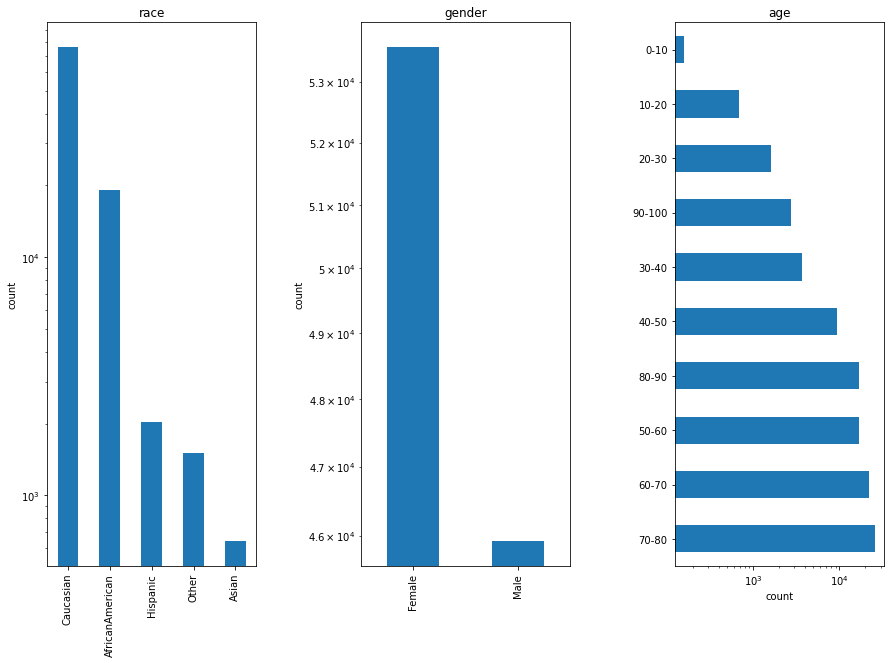

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))
diabetes.race.value_counts().plot(kind='bar', ax=ax[0])
ax[0].set_title('race')
ax[0].set_ylabel('count')
ax[0].set_yscale('log')
diabetes.gender.value_counts().plot(kind='bar', ax=ax[1])
ax[1].set_title('gender')
ax[1].set_ylabel('count')
ax[1].set_yscale('log')
diabetes.age.value_counts().plot(kind='barh', ax=ax[2])
ax[2].set_title('age')
ax[2].set_xlabel('count')
ax[2].set_xscale('log')
plt.subplots_adjust(wspace=0.5)

#### target variable - readmitted 

In [12]:
diabetes.readmitted.value_counts()

NO     53316
>30    35007
<30    11169
Name: readmitted, dtype: int64

'>30' and '<30' are treated as YES - Yes 1 and No 0 to look at readmission ratio

In [13]:
diabetes.readmitted = diabetes.readmitted.replace('NO',0)
diabetes.readmitted = diabetes.readmitted.replace(['<30', '>30'],1)

0    0.535882
1    0.464118
Name: readmitted, dtype: float64

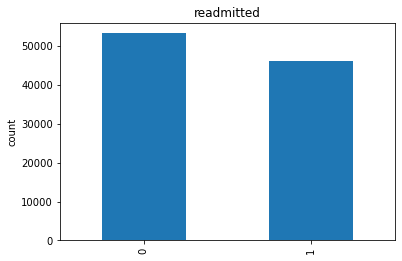

In [14]:
diabetes.readmitted.value_counts().plot(kind='bar', title='readmitted', ylabel='count')
diabetes.readmitted.value_counts(normalize=True)

#### 23 medication features

In [15]:
diabetes.loc[:,'metformin':'metformin-pioglitazone']

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,...,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
0,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Up,No,No,No,No,No
2,No,No,No,No,No,No,Steady,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Up,No,No,No,No,No
4,No,No,No,No,No,No,Steady,No,No,No,...,No,No,No,No,Steady,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,Steady,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Down,No,No,No,No,No
101762,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Steady,No,No,No,No,No
101763,Steady,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Down,No,No,No,No,No
101764,No,No,No,No,No,No,Steady,No,No,Steady,...,No,No,No,No,Up,No,No,No,No,No


'No' is treated as 0 and 'Up', 'Down' and 'Steady' are treated as 1 for all 23 medication features

In [16]:
diabetes.loc[:,'metformin':'metformin-pioglitazone'] = diabetes.loc[:,'metformin':'metformin-pioglitazone'].replace('No',0)
diabetes.loc[:,'metformin':'metformin-pioglitazone'] = diabetes.loc[:,'metformin':'metformin-pioglitazone'].replace(['Up','Down','Steady'],1)

In [17]:
drugs = diabetes.loc[:,'metformin':'metformin-pioglitazone']
drugs.head()

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,...,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


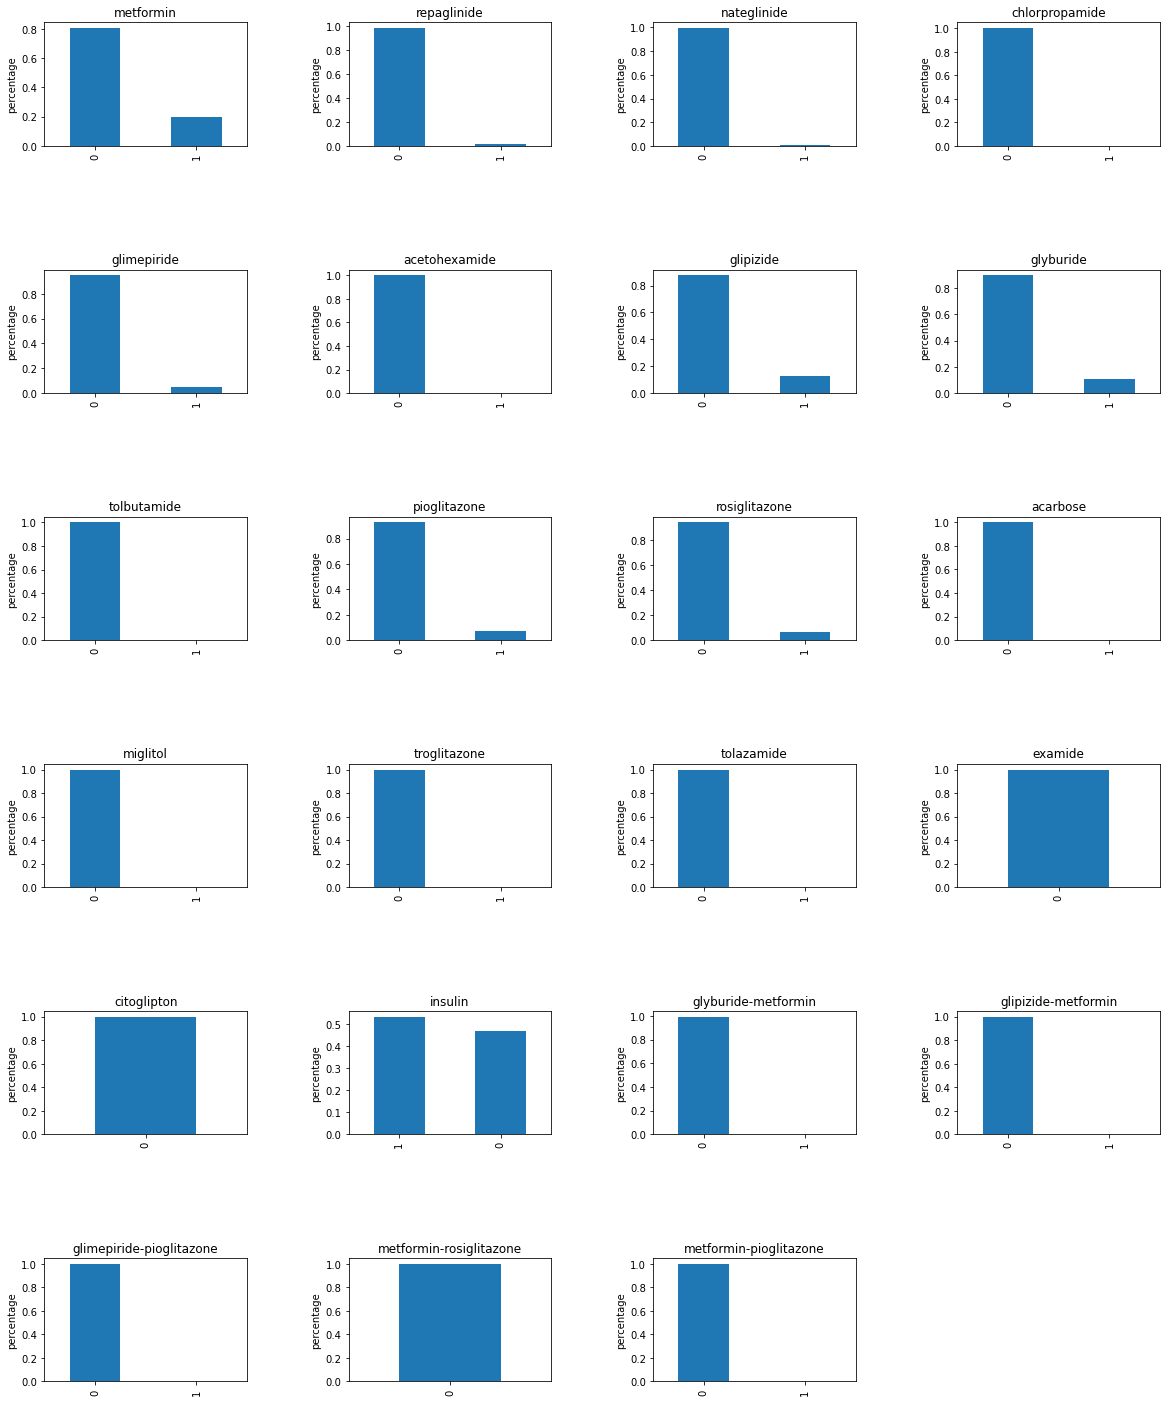

In [61]:
fig = plt.subplots(figsize=(20,25))
plt.subplots_adjust(hspace=1, wspace=0.5)

for i in range(len(drugs.columns)):
    ax = plt.subplot(6, 4, i + 1)
    ax.xaxis.set_label_position('top')
    #ax.set_xscale('log')
    drugs.iloc[:,i].value_counts(normalize=True).plot.bar(ax=ax, ylabel='percentage',title=drugs.columns[i])

,readmitted
metformin,
0,0.471083
1,0.435582


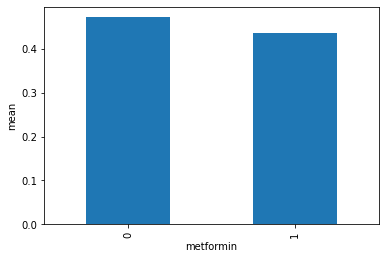

In [66]:
diabetes.groupby(['metformin'])['readmitted'].mean().plot(kind='bar').set_ylabel('mean')
diabetes.groupby(['metformin'])[['readmitted']].mean()

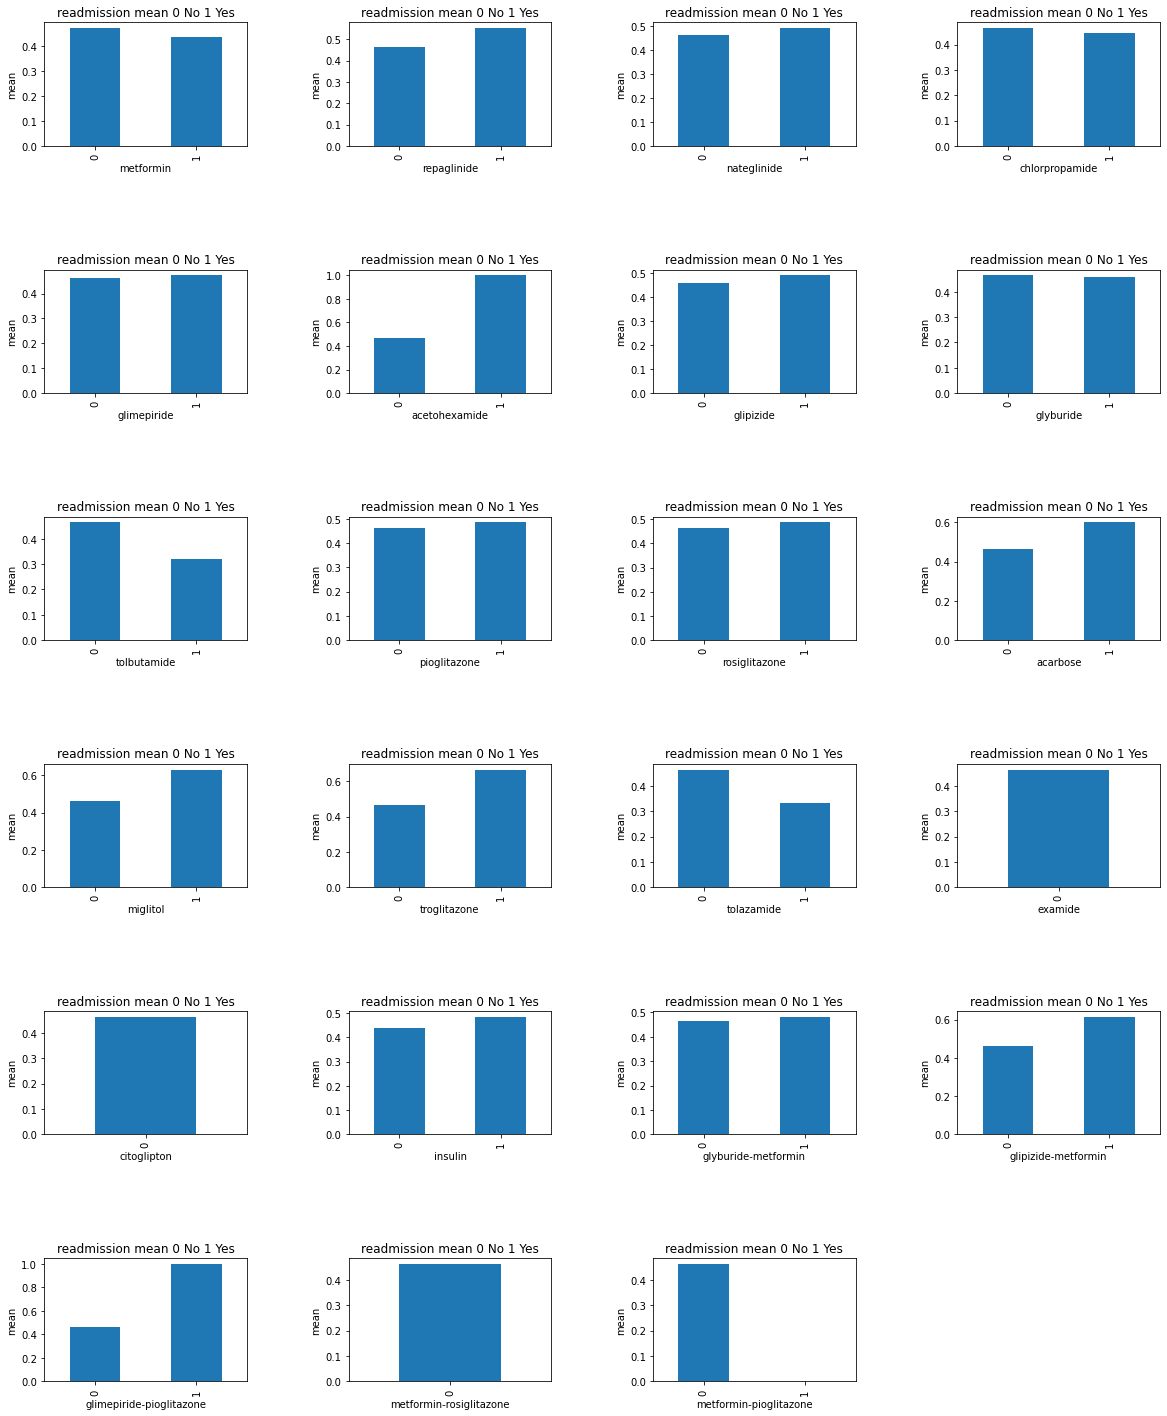

In [82]:
fig = plt.subplots(figsize=(20,25))
plt.subplots_adjust(hspace=1, wspace=0.5)

for i in range(len(drugs.columns)):
    ax = plt.subplot(6, 4, i + 1)
    ax.set_title('readmission mean 0 No 1 Yes')
    diabetes.groupby(drugs.iloc[:,i])['readmitted'].mean().plot(kind='bar').set_ylabel('mean')

In [20]:
readmitted_race = pd.crosstab(index=diabetes.race, columns=diabetes.readmitted)
readmitted_race

readmitted,0,1
race,,
AfricanAmerican,10421,8789
Asian,415,226
Caucasian,40383,35716
Hispanic,1183,854
Other,914,591


In [21]:
readmitted_gender = pd.crosstab(index=diabetes.gender, columns=diabetes.readmitted)
readmitted_gender

readmitted,0,1
gender,,
Female,28257,25318
Male,25059,20858


In [22]:
readmitted_age = pd.crosstab(index=diabetes.age, columns=diabetes.readmitted)
readmitted_age

readmitted,0,1
age,,
0-10,131,29
10-20,420,262
20-30,877,734
30-40,2102,1597
40-50,5218,4247
50-60,9409,7486
60-70,11734,10254
70-80,13143,12325
80-90,8654,8146


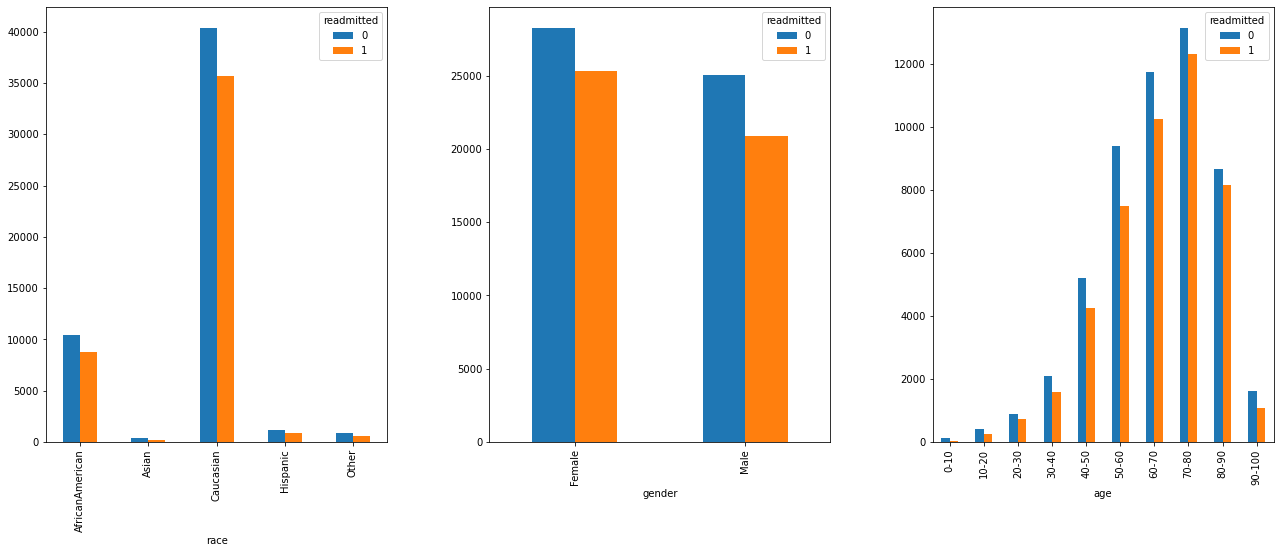

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(22,8))
readmitted_race.plot.bar(ax=ax[0])
readmitted_gender.plot.bar(ax=ax[1])
readmitted_age.plot.bar(ax=ax[2])
plt.subplots_adjust(wspace=0.3)

In [24]:
readmitted_metformin = pd.crosstab(index=diabetes.metformin, columns=diabetes.readmitted)
readmitted_repaglinide = pd.crosstab(index=diabetes.repaglinide, columns=diabetes.readmitted)


In [25]:
round(diabetes.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
time_in_hospital,99492.0,4.40,2.99,1.0,2.0,4.0,6.0,14.0
num_lab_procedures,99492.0,43.07,19.70,1.0,31.0,44.0,57.0,132.0
num_procedures,99492.0,1.34,1.70,0.0,0.0,1.0,2.0,6.0
num_medications,99492.0,16.03,8.12,1.0,10.0,15.0,20.0,81.0
number_outpatient,99492.0,0.37,1.28,0.0,0.0,0.0,0.0,42.0
number_emergency,99492.0,0.20,0.94,0.0,0.0,0.0,0.0,76.0
number_inpatient,99492.0,0.64,1.27,0.0,0.0,0.0,1.0,21.0
metformin,99492.0,0.20,0.40,0.0,0.0,0.0,0.0,1.0
repaglinide,99492.0,0.02,0.12,0.0,0.0,0.0,0.0,1.0
nateglinide,99492.0,0.01,0.08,0.0,0.0,0.0,0.0,1.0


,mean,std
readmitted,,
0,4.256658,2.965809
1,4.562175,3.002938


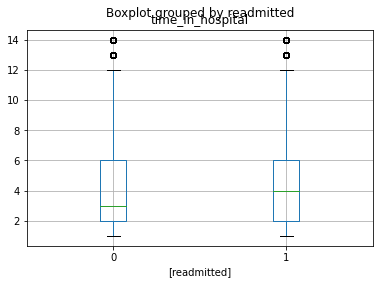

In [26]:
diabetes.boxplot(column=['time_in_hospital'],by = ['readmitted'])
pd.DataFrame(diabetes.groupby( ['readmitted'])['time_in_hospital'].describe().loc[:,['mean','std']])

In [27]:
diabetes.metformin = diabetes.metformin.replace('No', 0)
diabetes.metformin = diabetes.metformin.replace(['Steady','Up', 'Down'], 1)
diabetes.metformin

0         0
1         0
2         0
3         0
4         0
         ..
101761    1
101762    0
101763    1
101764    0
101765    0
Name: metformin, Length: 99492, dtype: int64

In [28]:
diabetes.readmitted = diabetes.readmitted.replace('NO',0)
diabetes.readmitted = diabetes.readmitted.replace(['<30', '>30'],1)

,readmitted
metformin,
0,0.471083
1,0.435582


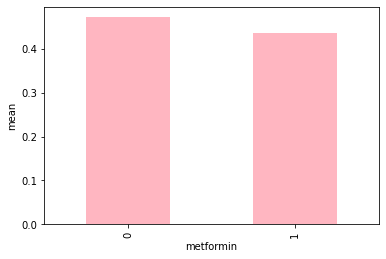

In [54]:
diabetes.groupby(['metformin'])['readmitted'].mean().plot(kind='bar',color='lightpink').set_ylabel('mean')
diabetes.groupby(['metformin' ])[['readmitted']].mean()

### numerical features

time_in_hospital, num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency and number_inpatient

array([[<AxesSubplot:title={'center':'time_in_hospital'}>,
        <AxesSubplot:title={'center':'num_lab_procedures'}>,
        <AxesSubplot:title={'center':'num_procedures'}>,
        <AxesSubplot:title={'center':'num_medications'}>,
        <AxesSubplot:title={'center':'number_outpatient'}>,
        <AxesSubplot:title={'center':'number_emergency'}>],
       [<AxesSubplot:title={'center':'number_inpatient'}>,
        <AxesSubplot:title={'center':'metformin'}>,
        <AxesSubplot:title={'center':'repaglinide'}>,
        <AxesSubplot:title={'center':'nateglinide'}>,
        <AxesSubplot:title={'center':'chlorpropamide'}>,
        <AxesSubplot:title={'center':'glimepiride'}>],
       [<AxesSubplot:title={'center':'acetohexamide'}>,
        <AxesSubplot:title={'center':'glipizide'}>,
        <AxesSubplot:title={'center':'glyburide'}>,
        <AxesSubplot:title={'center':'tolbutamide'}>,
        <AxesSubplot:title={'center':'pioglitazone'}>,
        <AxesSubplot:title={'center':'rosigli

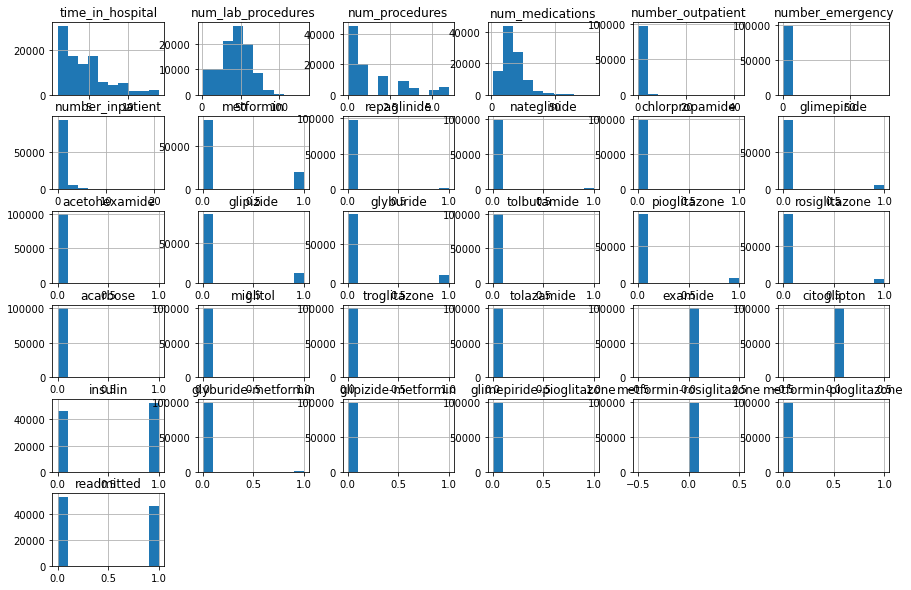

In [30]:
diabetes.hist(figsize=(15,10))

number_outpatient, number_emergency and number_inpatient are severly right skewed - need to be normalized 


graphs below to magnify on the tails - no obvious outliers

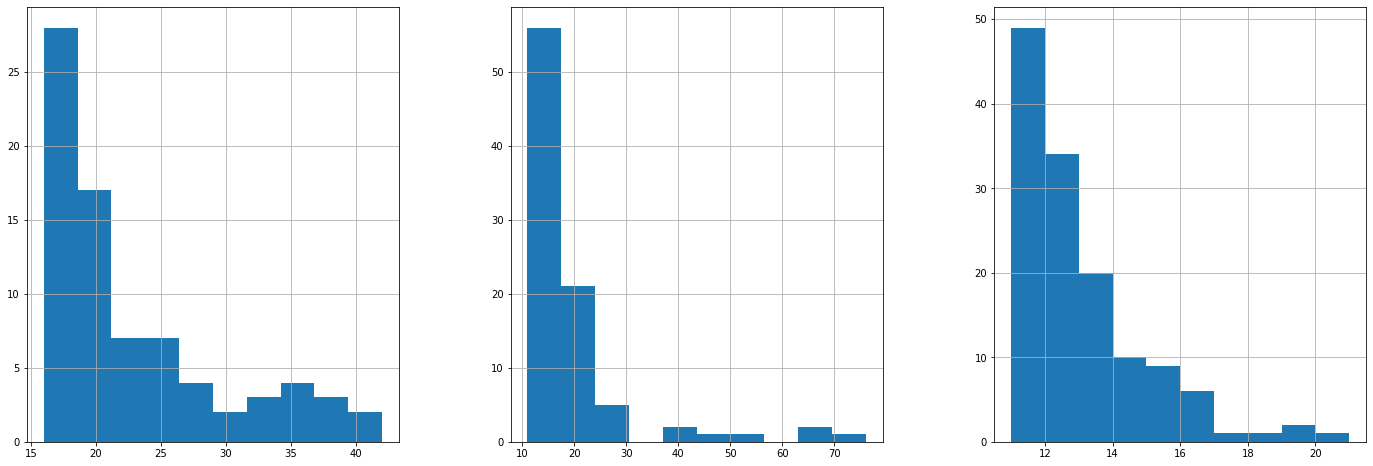

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,8))
diabetes.loc[diabetes.number_outpatient>15].number_outpatient.hist(ax=ax[0])
diabetes.loc[diabetes.number_emergency>10].number_emergency.hist(ax=ax[1])
diabetes.loc[diabetes.number_inpatient>10].number_inpatient.hist(ax=ax[2])
plt.subplots_adjust(wspace=0.3)

In [45]:
med_cols = diabetes.columns[10:-1]

df = []
for i in med_cols:
    df.append(pd.crosstab(index=diabetes[i], columns=diabetes.readmitted))

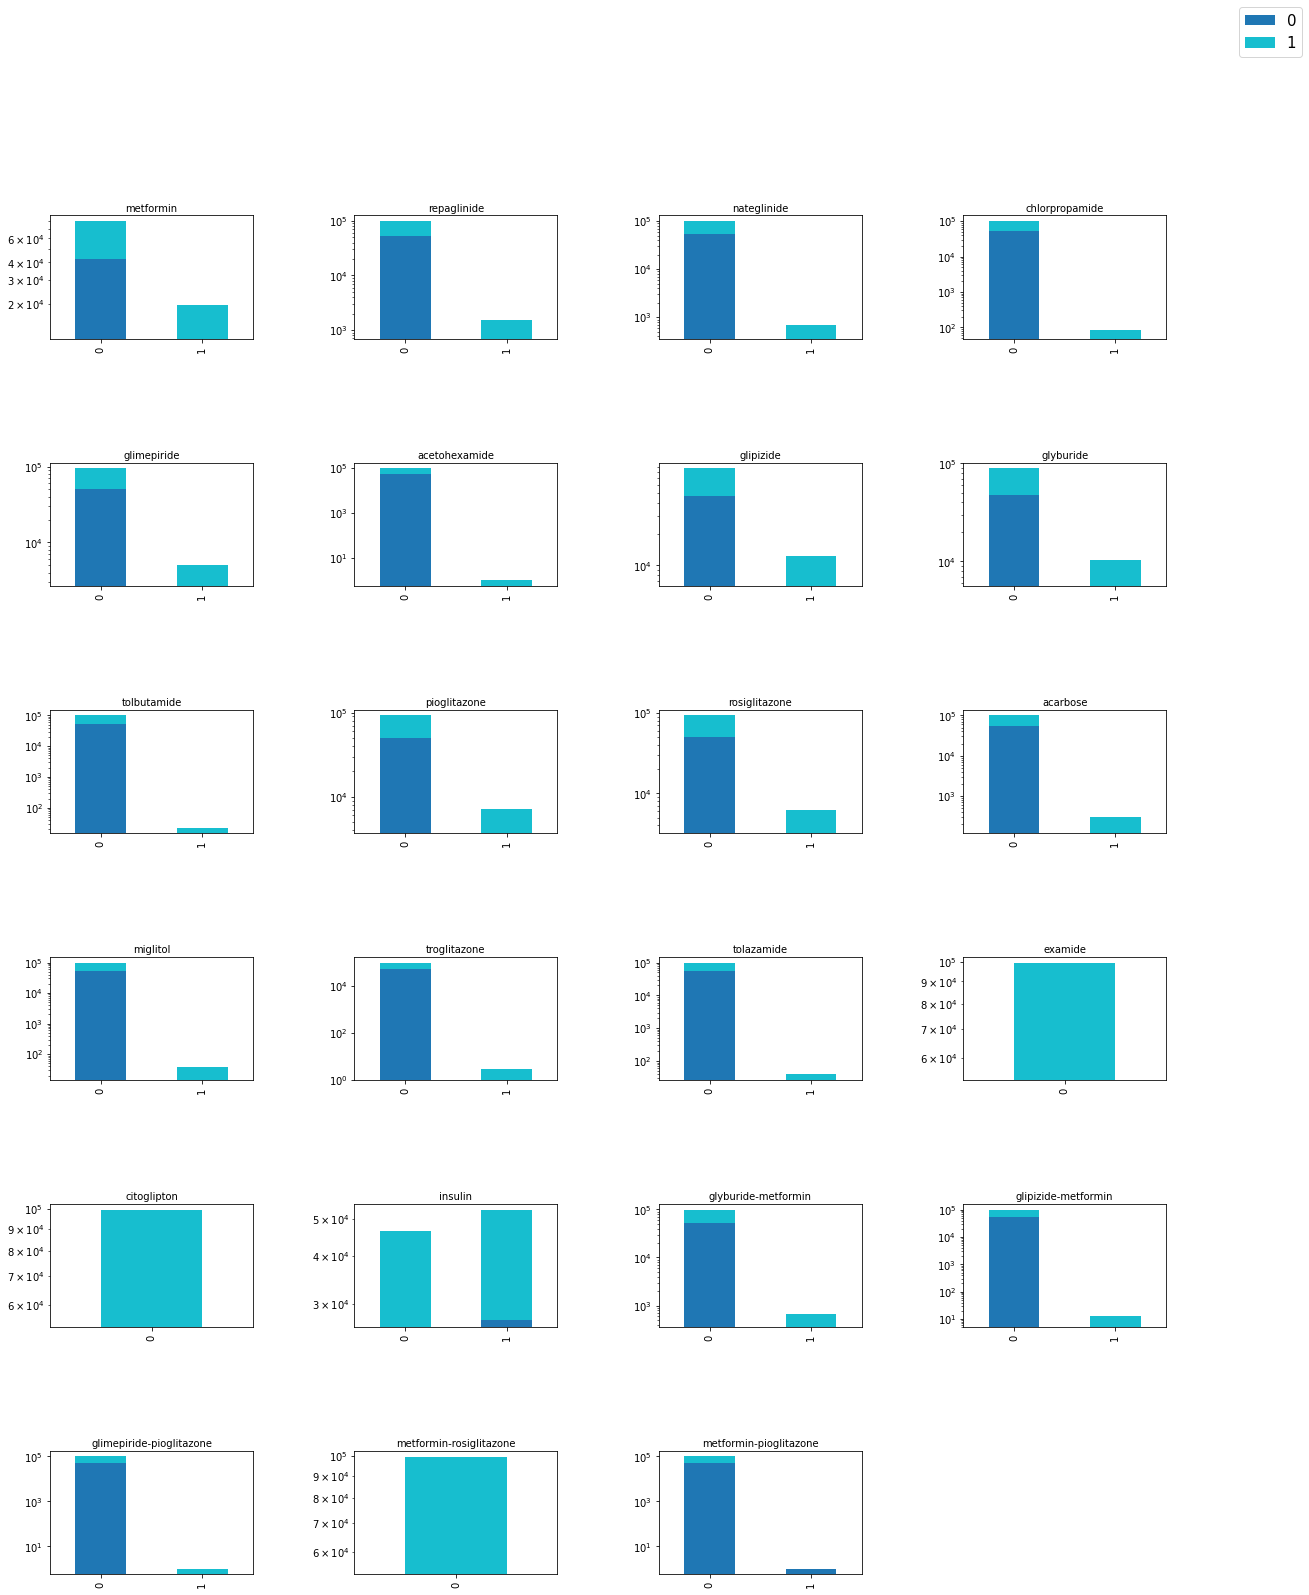

In [52]:
fig = plt.subplots(figsize=(20,25))
plt.subplots_adjust(hspace=1, wspace=0.5)

for i in range(len(df)):
    ax = plt.subplot(6, 4, i + 1)
    ax.xaxis.set_label_position('top')
    ax.set_yscale('log')
    df[i].plot.bar(ax=ax,legend=0,stacked=True,colormap='tab10')

handles, labels = ax.get_legend_handles_labels()  
fig[0].legend(labels, loc='upper right', prop={'size': 15})

No one was taking medications like examide, citoglipton and metformin-rosiglitazone - need to take these columns out of the dataset

A lot of other medications have many 'No' values as well - need to investigate on how many patients were taking these drugs